<a href="https://colab.research.google.com/github/navas604/Ciencia-de-Datos-en-Python/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Ciencia de Datos en Python**
## **Antonio Everardo Navas Contreras, 14003163**
## **07/04/2021**

---

## **PROYECTO**

---

### CARGAR LIBRERIAS

In [1]:
# Importar las librerías que se utilizarán

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### CARGAR Y PREPARAR EL DATASET, SEPARAR EN TRAIN Y TEST

In [2]:
# Cargar el Dataset original

URL = "proyecto_training_data.npy"
dataset = np.load(URL) 

In [3]:
# Mostrar el Datast Original

dataset

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
# Explorando el Dataset

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1460, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   259


In [5]:
# Limpiar el dataset de valores "nan"

dataset = dataset[~np.isnan(dataset).any(axis=1)]

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1201, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   0


In [6]:
# Convertirlo a DataFrame

variables = list(["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

df = pd.DataFrame(dataset, columns=variables)

df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1196,175000.0,6.0,953.0,7.0,1999.0,62.0
1197,210000.0,6.0,2073.0,7.0,1978.0,85.0
1198,266500.0,7.0,1188.0,9.0,1941.0,66.0
1199,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [7]:
# Revisar el tipo de las variables

print(df.dtypes)

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object


In [8]:
# Convertir algunas variables a enteros

df["OverallQual"] = df["OverallQual"].astype(int)
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"].astype(int)
df["YearBuilt"] = df["YearBuilt"].astype(int)

print(df.dtypes)

SalePrice       float64
OverallQual       int64
1stFlrSF        float64
TotRmsAbvGrd      int64
YearBuilt         int64
LotFrontage     float64
dtype: object


In [9]:
# Visualizar los datos despues de la conversión de las variables

df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1196,175000.0,6,953.0,7,1999,62.0
1197,210000.0,6,2073.0,7,1978,85.0
1198,266500.0,7,1188.0,9,1941,66.0
1199,142125.0,5,1078.0,5,1950,68.0


In [10]:
# Separar dataframe en Train y Test

rows, columns = df.shape

train = df.loc[:int(rows*0.8),]
test = df.loc[int(rows*0.8)+1:,]

print("Train shape: ", train.shape)
print("Test shape:  ", test.shape)

Train shape:  (961, 6)
Test shape:   (240, 6)


In [11]:
# Ver los dataframes de Train y Test

print(train)
print(test)

     SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     208500.0            7     856.0             8       2003         65.0
1     181500.0            6    1262.0             6       1976         80.0
2     223500.0            7     920.0             6       2001         68.0
3     140000.0            7     961.0             7       1915         60.0
4     250000.0            8    1145.0             9       2000         84.0
..         ...          ...       ...           ...        ...          ...
956   146000.0            6     855.0             7       1978         24.0
957   129000.0            5     894.0             5       1968        109.0
958   108959.0            4    1258.0             6       1969         60.0
959   233170.0            7    1502.0             7       2009         79.0
960   245350.0            8    1694.0             7       2008         64.0

[961 rows x 6 columns]
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt 

### ANALISIS EXPLORATORIO

In [12]:
# Estadística descriptiva utilizando la función .describe() de la librería pandas

round(train.describe(), 2)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,961.00,961.00,961.00,961.00,961.00,961.00
mean,181002.57,6.12,1155.83,6.50,1970.64,69.96
std,83374.26,1.42,372.73,1.62,31.55,23.49
min,34900.00,1.00,334.00,2.00,1875.00,21.00
25%,127500.00,5.00,877.00,5.00,1950.00,59.00
50%,159500.00,6.00,1086.00,6.00,1972.00,70.00
75%,214000.00,7.00,1391.00,7.00,2003.00,80.00
max,755000.00,10.00,3138.00,14.00,2010.00,313.00


In [13]:
# Agregar el rango a la tabla de estadística descriptiva

round(train.describe().append(pd.Series(train.max() - train.min(), name = "range")), 2)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,961.00,961.00,961.00,961.00,961.00,961.00
mean,181002.57,6.12,1155.83,6.50,1970.64,69.96
std,83374.26,1.42,372.73,1.62,31.55,23.49
min,34900.00,1.00,334.00,2.00,1875.00,21.00
25%,127500.00,5.00,877.00,5.00,1950.00,59.00
50%,159500.00,6.00,1086.00,6.00,1972.00,70.00
75%,214000.00,7.00,1391.00,7.00,2003.00,80.00
max,755000.00,10.00,3138.00,14.00,2010.00,313.00
range,720100.00,9.00,2804.00,12.00,135.00,292.00


In [14]:
# Media utilizando la librería numpy

print(" VARIABLE         MEDIA \n\n", round(np.mean(train, axis=0), 2))

 VARIABLE         MEDIA 

 SalePrice       181002.57
OverallQual          6.12
1stFlrSF          1155.83
TotRmsAbvGrd         6.50
YearBuilt         1970.64
LotFrontage         69.96
dtype: float64


In [15]:
# Valor Máximo utilizando la librería numpy

print(" VARIABLE      VALOR MAXIMO \n\n", np.max(train, axis=0))

 VARIABLE      VALOR MAXIMO 

 SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3138.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


In [16]:
# Valor Mínimo utilizando la librería numpy

print(" VARIABLE      VALOR MINIMO \n\n", np.min(train, axis=0))

 VARIABLE      VALOR MINIMO 

 SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


In [17]:
# Desviación Estándar utilizando la librería numpy

print(" VARIABLE    DESVIACION ESTANDAR \n\n", round(np.std(train, axis=0), 2))

 VARIABLE    DESVIACION ESTANDAR 

 SalePrice       83330.87
OverallQual         1.42
1stFlrSF          372.53
TotRmsAbvGrd        1.62
YearBuilt          31.53
LotFrontage        23.47
dtype: float64


In [18]:
# Rango utilizando la librería numpy

print(" VARIABLE      RANGO \n\n", np.max(train, axis=0) - np.min(train, axis=0))

 VARIABLE      RANGO 

 SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2804.0
TotRmsAbvGrd        12.0
YearBuilt          135.0
LotFrontage        292.0
dtype: float64


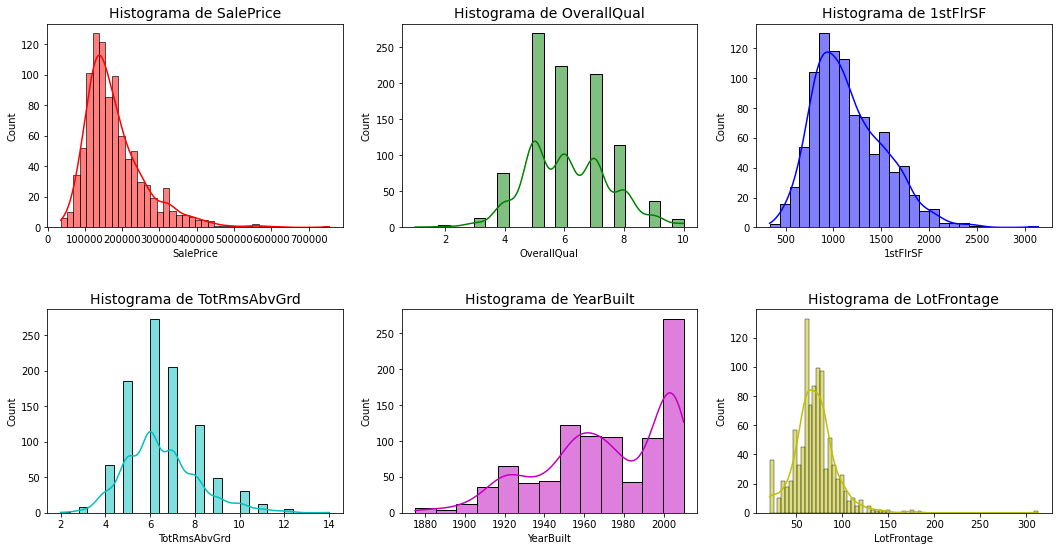

In [19]:
# Histograma de cada variable

plt.figure(figsize=(18, 9))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns):
  plt.subplot(2, 3, i+1)
  sns.histplot(train.iloc[:,i], kde=True, color=colors[i])
  plt.title("Histograma de {}".format(train.columns[i]), fontdict={"fontsize":14, "color":"black"})

plt.show()  

In [20]:
# Matriz de Correlación entre todas las variables

corr_matrix = round(train.corr(), 2)

corr_matrix

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.00,0.81,0.64,0.57,0.55,0.36
OverallQual,0.81,1.00,0.52,0.46,0.58,0.24
1stFlrSF,0.64,0.52,1.00,0.43,0.35,0.42
TotRmsAbvGrd,0.57,0.46,0.43,1.00,0.14,0.34
YearBuilt,0.55,0.58,0.35,0.14,1.00,0.12
LotFrontage,0.36,0.24,0.42,0.34,0.12,1.00


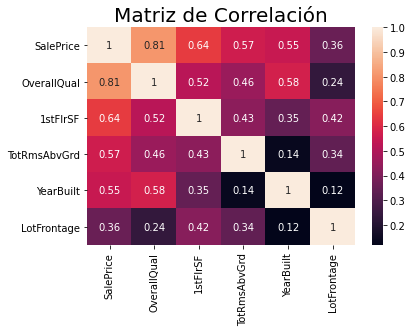

In [21]:
# Visualización de Matriz de Correlación entre todas las variables

sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlación", fontdict={"fontsize":20, "color":"black"})

plt.show()

In [22]:
# Coeficientes de correlación con el precio de venta "SalePrice"

corr_matrix["SalePrice"]

SalePrice       1.00
OverallQual     0.81
1stFlrSF        0.64
TotRmsAbvGrd    0.57
YearBuilt       0.55
LotFrontage     0.36
Name: SalePrice, dtype: float64

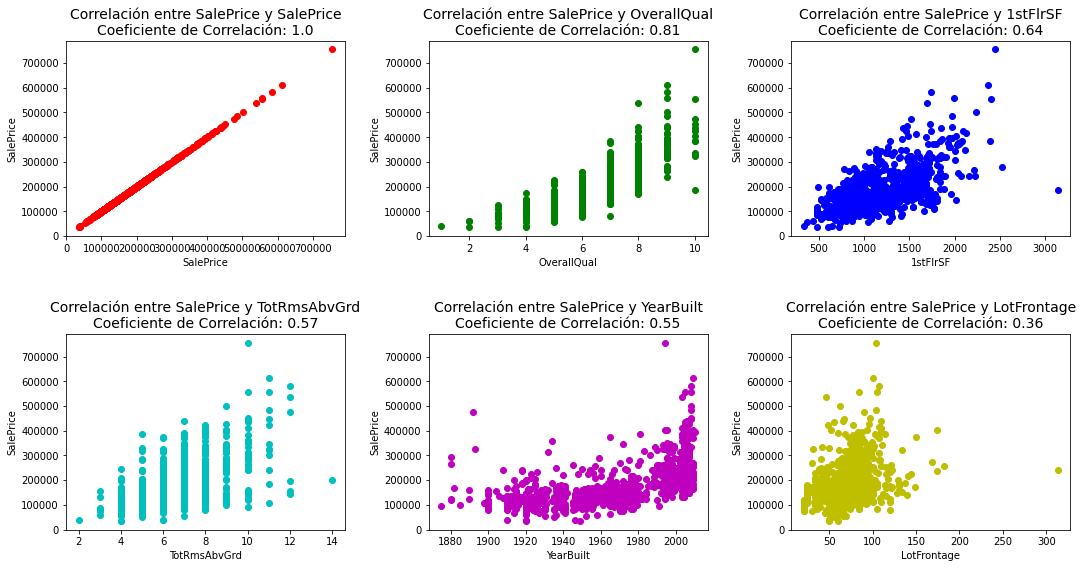

In [23]:
# Gráfica de dispersión de cada variable x con y ("SalePrice")

plt.figure(figsize=(18, 9))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns):
  plt.subplot(2, 3, i+1)
  plt.scatter(train.iloc[:,i], train.iloc[:,0], color=colors[i])
  plt.title("Correlación entre SalePrice y {}\nCoeficiente de Correlación: {}".format(train.columns[i], corr_matrix.iloc[0,i]), 
            fontdict={"fontsize":14, "color":"black"})
  plt.xlabel(train.columns[i])
  plt.ylabel(train.columns[0])

plt.show()


Las 2 variables con mayor potencial predictivo (que presentan mayor correlación) son:

*   **OverallQual** con coeficiente de correlación de **0.81**
*   **1stFlrSF** con coeficiente de correlación de **0.64**


### FUNCIONES

In [24]:
# Función para entrenar el modelo

def train_function(x, y, epochs, imprimir_error_cada, lr):
  
  x = np.array(x).reshape(-1,1)
  x = np.hstack((x, np.ones_like(x)))

  y = np.array(y).reshape(-1,1)

  mb = [0, 0]
  error = []
  modelo_dict = {}
  error_dict = {}

  for i in range(epochs):
    yhat = np.matmul(x, np.array(mb).reshape(-1,1))
    
    error.append(round(0.5 * np.mean(np.power(y - yhat, 2)), 2))

    gradientes_m_b = np.matmul((yhat - y).reshape(1,-1), x/3)
    
    mb -= (lr * gradientes_m_b[0])

    modelo_dict[i] = list(mb)
    error_dict[i] = error[i]

    if i % imprimir_error_cada == 0:
      print("Iteración:", i, "  Error:", error[i])

  return ("----------------------------------------------------------------------------------------------------------------------",
         "Modelo (mb) de cada iteración: ", modelo_dict,
         "----------------------------------------------------------------------------------------------------------------------",
         "Error de cada modelo en cada iteración: ", error_dict)


In [25]:
# Función para graficar como cambia el Error por cada Iteración

def error_por_iteracion_graph(errores):

  plt.plot(list(errores.keys()), list(errores.values()), color="green", linewidth=2)

  plt.title("Error por cada Iteración", fontdict={"fontsize":20, "color":"black"})
  plt.xlabel("Iteración")
  plt.ylabel("Error")

  return plt.show()


In [26]:
# Función para graficar como evoluciona el modelo entrenado en el tiempo

def evolucion_modelo_graph(modelos, n, x, y):

  mb_list = list(modelos.values())
  
  matrix = np.array(x).reshape(-1,1)
  ones_matrix = np.ones_like(matrix)
  new_matrix = np.hstack((matrix, ones_matrix))

  for i in range(0, len(mb_list), n):
    mb = mb_list[i]
    yhat = np.matmul(new_matrix, mb)
    plt.plot(x, yhat, "orange", linewidth=2)
    
  plt.plot(x, y, "b.", ms=10)

  plt.title("Evolución del modelo entrenado", fontdict={"fontsize":20, "color":"black"})
  plt.xlabel("Variable independiente x")
  plt.ylabel("Precio de casa")

  return plt.show()

In [27]:
# Función para calcular las predicciones del modelo entrenado manualmente; entrenado con SCIKIT-LEARN; y promedio

def prediccion_promedio(mb_model, LR_model, x):
  matrix = np.array(x).reshape(-1,1)
  ones_matrix = np.ones_like(matrix)
  new_matrix = np.hstack((matrix, ones_matrix))

  yhat_manual = np.matmul(new_matrix, mb_model).reshape(-1,1)
  yhat_scikit_learn = LR_model.predict(matrix)
  yhat_promedio = (yhat_manual + yhat_scikit_learn) / 2

  return ("Predicción de SalePrice con el modelo entrenado manualmente: ", yhat_manual,
         "----------------------------------------------------------------------------------------------------------------------",
         "Predicción de SalePrice con  el modelo entrenado con SCIKIT-LEARN: ", yhat_scikit_learn,
         "----------------------------------------------------------------------------------------------------------------------",
         "Predicción de SalePrice promedio de las 2 anteriores: ", yhat_promedio)

### ENTRENAR MODELOS MANUALMENTE CON LA FUNCION CREADA

#### Entrenar modelo manualmente con datos de prueba brindados en el Excel

In [28]:
# Datos de prueba brindados en el excel

x = [65, 80, 68]
y = [208.5, 181.5, 223.5]

epochs = 3
imprimir_error_cada = 1
lr = 0.001

In [29]:
# Entrenar el modelo manualmente. Datos de prueba brindados en el excel

train_excel = train_function(x, y, epochs, imprimir_error_cada, lr)
modelos_excel = train_excel[2]
errores_excel = train_excel[5]

train_excel

Iteración: 0   Error: 21061.12
Iteración: 1   Error: 341918.33
Iteración: 2   Error: 5693492.05


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb) de cada iteración: ',
 {0: [14.4235, 0.20450000000000002],
  1: [-44.48217000000001, -0.6152730000000002],
  2: [196.08788449300005, 2.7480763430000006]},
 '----------------------------------------------------------------------------------------------------------------------',
 'Error de cada modelo en cada iteración: ',
 {0: 21061.12, 1: 341918.33, 2: 5693492.05})

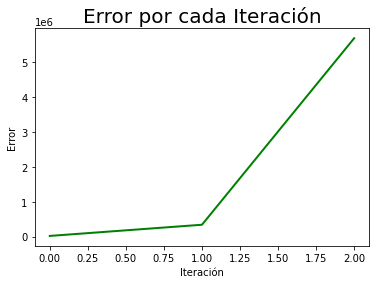

In [30]:
# Graficar error por cada interación. Datos de prueba brindados en el excel

error_por_iteracion_graph(errores_excel)

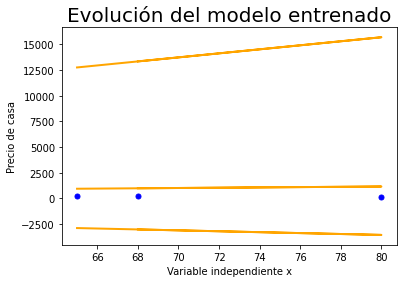

In [31]:
# Graficar Evolución del modelo entrenado. Datos de prueba brindados en el excel

n = 1

evolucion_modelo_graph(modelos_excel, n, x, y)

#### Entrenar modelo manualmente con variable **"OverallQual"**

In [32]:
# Separar el vector de la variable "OverallQual"

SalePrice = train["SalePrice"]
OverallQual = train["OverallQual"]

epochs = 300
imprimir_error_cada = 50
lr = 0.000152

In [33]:
# Entrenar el modelo manualmente con la variable "OverallQual"

train_OverallQual = train_function(OverallQual, SalePrice, epochs, imprimir_error_cada, lr)
modelos_OverallQual = train_OverallQual[2]
errores_OverallQual = train_OverallQual[5]

train_OverallQual

Iteración: 0   Error: 19852981010.0
Iteración: 50   Error: 2409212997.22
Iteración: 100   Error: 1456286519.88
Iteración: 150   Error: 1365717120.11
Iteración: 200   Error: 1328555526.65
Iteración: 250   Error: 1301139809.21


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb) de cada iteración: ',
 {0: [58632.727455999986, 8813.135560000004],
  1: [1797.1533751936222, -288.532838678233],
  2: [57057.26584243901, 8002.697309428471],
  3: [3495.395484232402, -589.6698462946715],
  4: [55577.00880210419, 7209.766308744922],
  5: [5100.397725262643, -902.5443323374548],
  6: [54186.4545309465, 6433.475701681565],
  7: [6617.5051581789885, -1226.3401752540813],
  8: [52880.41801290488, 5673.007847146392],
  9: [8051.755288053762, -1560.2889084169292],
  10: [51654.01278516483, 4927.591489701951],
  11: [9407.895767400398, -1903.6669738356295],
  12: [50502.63375300616, 4196.499092894526],
  13: [10690.40107950139, -2255.793133961077],
  14: [49421.940993825585, 3479.044326060356],
  15: [11903.488261450737, -2616.026032481055],
  16: [48407.84449339893, 2774.5796957749153],
  17: [13051.131722184698, -2983.7618955315656],
  18:

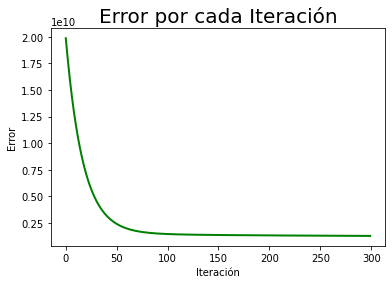

In [34]:
# Graficar error por cada interación. Variable "OverallQual"

error_por_iteracion_graph(errores_OverallQual)

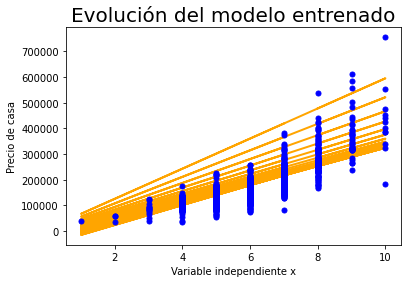

In [35]:
# Graficar Evolución del modelo entrenado. Variable "OverallQual"

n = 10    # Graficar cada n iteraciones

evolucion_modelo_graph(modelos_OverallQual, n, OverallQual, SalePrice)

#### Entrenar modelo manualmente con variable **"1stFlrSF"**

In [36]:
# Separar el vector de la variable "1stFlrSF"

SalePrice = train["SalePrice"]
FirstFlrSF = train["1stFlrSF"]

epochs = 10
imprimir_error_cada = 2
lr = 0.0000000013

In [37]:
# Entrenar el modelo manualmente con la variable "1stFlrSF"

train_FirstFlrSF = train_function(FirstFlrSF, SalePrice, epochs, imprimir_error_cada, lr)
modelos_FirstFlrSF = train_FirstFlrSF[2]
errores_FirstFlrSF = train_FirstFlrSF[5]

train_FirstFlrSF

Iteración: 0   Error: 19852981010.0
Iteración: 2   Error: 2454809530.12
Iteración: 4   Error: 2069086928.76
Iteración: 6   Error: 2060535343.05
Iteración: 8   Error: 2060345750.14


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb) de cada iteración: ',
 {0: [95.39758248843332, 0.07537550150000004],
  1: [132.20880453668053, 0.10483348218616903],
  2: [146.41321114976913, 0.11657319344350306],
  3: [151.89428864189102, 0.12147592686752792],
  4: [154.0092807527717, 0.1237404643751941],
  5: [154.82539595133085, 0.12498699686308226],
  6: [155.14031137558723, 0.12584071006202674],
  7: [155.26182801711207, 0.12654284542009628],
  8: [155.30871755168323, 0.12718649117234804],
  9: [155.32681060153192, 0.127807567429424]},
 '----------------------------------------------------------------------------------------------------------------------',
 'Error de cada modelo en cada iteración: ',
 {0: 19852981010.0,
  1: 4709610836.67,
  2: 2454809530.12,
  3: 2119076540.46,
  4: 2069086928.76,
  5: 2061643628.37,
  6: 2060535343.05,
  7: 2060370322.02,
  8: 2060345750.14,
  9: 2060342090.7

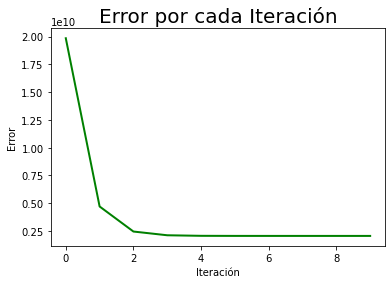

In [38]:
# Graficar error por cada interación. Variable "1stFlrSF"

error_por_iteracion_graph(errores_FirstFlrSF)

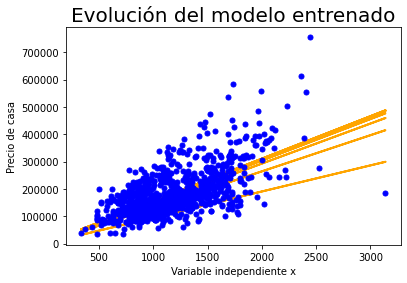

In [39]:
# Graficar Evolución del modelo entrenado. Variable "1stFlrSF"

n = 1    # Graficar cada n iteraciones

evolucion_modelo_graph(modelos_FirstFlrSF, n, FirstFlrSF, SalePrice)

### ENTRENAR MODELOS CON LA FUNCION **SCIKIT-LEARN**

In [40]:
# Preparar las 2 variables seleccionadas con mayor correlación("OverallQual" y "1stFlrSF"), para utilizarlas con SCIKIT-LEARN

SalePrice_train = np.array(train["SalePrice"]).reshape(-1,1)
OverallQual_train = np.array(train["OverallQual"]).reshape(-1,1)
FirstFlrSF_train = np.array(train["1stFlrSF"]).reshape(-1,1)

#### Entrenar modelo con SCIKIT-LEARN con variable **"OverallQual"**

In [41]:
# Entrenar el modelo con SCIKIT-LEARN con la variable "OverallQual"

LR_OverallQual = LinearRegression()
LR_OverallQual.fit(OverallQual_train, SalePrice_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Entrenar modelo con SCIKIT-LEARN con variable **"1stFlrSF"**

In [42]:
# Entrenar el modelo con SCIKIT-LEARN con la variable "1stFlrSF"

LR_FirstFlrSF = LinearRegression()
LR_FirstFlrSF.fit(FirstFlrSF_train, SalePrice_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### PREDICCIONES CON EL MODELO ENTRENADO MANUALMENTE; ENTRENADO CON SCIKIT-LEARN; Y PROMEDIO

In [43]:
# Preparar las 2 variables seleccionadas con mayor correlación("OverallQual" y "1stFlrSF") del dataset test

SalePrice_test = np.array(test["SalePrice"]).reshape(-1,1)
OverallQual_test = test["OverallQual"]
FirstFlrSF_test = test["1stFlrSF"]

In [44]:
# Último modelo(con menor error) para cada variable x elegida

mb_OverallQual = modelos_OverallQual[len(modelos_OverallQual)-1]
mb_FirstFlrSF = modelos_FirstFlrSF[len(modelos_FirstFlrSF)-1]

print("Modelo (mb) con menor error para OverallQual: ", mb_OverallQual)
print("Modelo (mb) con menor error para FirstFlrSF:  ", mb_FirstFlrSF)

Modelo (mb) con menor error para OverallQual:  [38911.20187620932, -54595.266807691696]
Modelo (mb) con menor error para FirstFlrSF:   [155.32681060153192, 0.127807567429424]


#### Predicciones de **"SalePrice"** utilizando la variable **"OverallQual"**, con modelo manual; con SCIKIT-LEARN; y promedio de ambos

In [45]:
# Predicciones de "SalePrice" utilizando la variable "OverallQual"

predicciones_OverallQual = prediccion_promedio(mb_OverallQual, LR_OverallQual, OverallQual_test)
ypred_manual_OverallQual = predicciones_OverallQual[1]
ypred_scikit_OverallQual = predicciones_OverallQual[4]
ypred_promedio_OverallQual = predicciones_OverallQual[7]

predicciones_OverallQual

('Predicción de SalePrice con el modelo entrenado manualmente: ',
 array([[178871.94444956],
        [178871.94444956],
        [334516.7519544 ],
        [178871.94444956],
        [178871.94444956],
        [217783.14632577],
        [139960.74257335],
        [178871.94444956],
        [256694.34820198],
        [139960.74257335],
        [139960.74257335],
        [139960.74257335],
        [256694.34820198],
        [334516.7519544 ],
        [139960.74257335],
        [139960.74257335],
        [139960.74257335],
        [ 62138.33882094],
        [256694.34820198],
        [217783.14632577],
        [217783.14632577],
        [256694.34820198],
        [139960.74257335],
        [178871.94444956],
        [178871.94444956],
        [217783.14632577],
        [217783.14632577],
        [217783.14632577],
        [101049.54069715],
        [101049.54069715],
        [217783.14632577],
        [139960.74257335],
        [217783.14632577],
        [139960.74257335],
        [217783.

#### Predicciones de **"SalePrice"** utilizando la variable **"1stFlrSF"**, con modelo manual; con SCIKIT-LEARN; y promedio de ambos

In [46]:
# Predicciones de "SalePrice" utilizando la variable "1stFlrSF"

predicciones_FirstFlrSF = prediccion_promedio(mb_FirstFlrSF, LR_FirstFlrSF, FirstFlrSF_test)
ypred_manual_FirstFlrSF = predicciones_FirstFlrSF[1]
ypred_scikit_FirstFlrSF = predicciones_FirstFlrSF[4]
ypred_promedio_FirstFlrSF = predicciones_FirstFlrSF[7]

predicciones_FirstFlrSF

('Predicción de SalePrice con el modelo entrenado manualmente: ',
 array([[148958.53917444],
        [191984.06571106],
        [284403.51801897],
        [173655.50206008],
        [195867.2359761 ],
        [ 97079.38443352],
        [254114.78995167],
        [181732.49621136],
        [330690.90757823],
        [143366.77399278],
        [127368.11250082],
        [174587.46292369],
        [256600.0189213 ],
        [374493.06816786],
        [175519.4237873 ],
        [244173.87407318],
        [147405.27106842],
        [157501.51375752],
        [252250.86822446],
        [129076.70741744],
        [159676.08910594],
        [118669.81110714],
        [130785.30233406],
        [102981.80323638],
        [113078.04592548],
        [136532.39432631],
        [126591.47844782],
        [188256.22225662],
        [214661.78005888],
        [134202.49216729],
        [134513.14578849],
        [137309.02837932],
        [253182.82908806],
        [166821.12239361],
        [341097.

### ERROR DE LA PREDICCIÓN DE CADA MODELO, ENTRENADO MANUALMENTE Y CON SCIKIT-LEARN

#### Error de la predicción de **"SalePrice"** utilizando la variable **"OverallQual"**

In [47]:
# Error de la predicción de "SalePrice" utilizando la variable "OverallQual" con modelos manual y SCIKIT-LEARN

errores_pred_OverallQual_manual_scikit = (round(0.5 * np.mean(np.power(SalePrice_test - ypred_manual_OverallQual, 2)), 2),
                                          round(0.5 * np.mean(np.power(SalePrice_test - ypred_scikit_OverallQual, 2)), 2))

print("Error predicción de SalePrice con variable OverallQual con modelo entrenado manualmente:      ",
      errores_pred_OverallQual_manual_scikit[0])
print("Error predicción de SalePrice con variable OverallQual con modelo entrenado con SCIKIT-LEARN: ",
      errores_pred_OverallQual_manual_scikit[1])


Error predicción de SalePrice con variable OverallQual con modelo entrenado manualmente:       1432051278.61
Error predicción de SalePrice con variable OverallQual con modelo entrenado con SCIKIT-LEARN:  1384149389.24


#### Error de la predicción de **"SalePrice"** utilizando la variable **"1stFlrSF"**

In [48]:
# Error de la predicción de "SalePrice" utilizando la variable "1stFlrSF" con modelos manual y SCIKIT-LEARN

errores_pred_FirstFlrSF_manual_scikit = (round(0.5 * np.mean(np.power(SalePrice_test - ypred_manual_FirstFlrSF, 2)), 2),
                                          round(0.5 * np.mean(np.power(SalePrice_test - ypred_scikit_FirstFlrSF, 2)), 2))

print("Error predicción de SalePrice con variable 1stFlrSF con modelo entrenado manualmente:      ",
      errores_pred_FirstFlrSF_manual_scikit[0])
print("Error predicción de SalePrice con variable 1stFlrSF con modelo entrenado con SCIKIT-LEARN: ",
      errores_pred_FirstFlrSF_manual_scikit[1])


Error predicción de SalePrice con variable 1stFlrSF con modelo entrenado manualmente:       2621719539.23
Error predicción de SalePrice con variable 1stFlrSF con modelo entrenado con SCIKIT-LEARN:  2526986112.37


#### Gráfica del error de predicción de cada modelo, entrenado manualmente y entrenado con SCIKIT-LEARN, con las variables **"OverallQual"** y **"1stFlrSF"**

In [49]:
# Preparar los datos a utilizar en la gráfica de barras

errores_modelos = pd.DataFrame({"Variable x" : ["OverallQual", "OverallQual", "1stFlrSF", "1stFlrSF"],
                                "Error" : [errores_pred_OverallQual_manual_scikit[0], errores_pred_OverallQual_manual_scikit[1],
                                           errores_pred_FirstFlrSF_manual_scikit[0], errores_pred_FirstFlrSF_manual_scikit[1]],
                                "Model" : ["MANUAL", "SCIKIT-LEARN", "MANUAL", "SCIKIT-LEARN"]})

errores_modelos

,Variable x,Error,Model
0,OverallQual,1.432051e+09,MANUAL
1,OverallQual,1.384149e+09,SCIKIT-LEARN
2,1stFlrSF,2.621720e+09,MANUAL
3,1stFlrSF,2.526986e+09,SCIKIT-LEARN


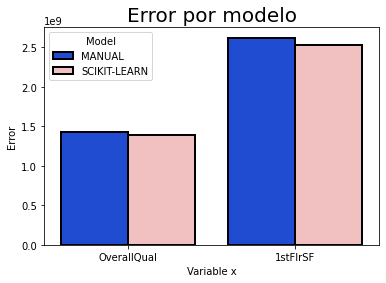

In [50]:
# Graficar el error de predicción cada modelo con las variables elegidas de mayor correlación "OverallQual" y "1stFlrSF"

colors = ["#013DEF", "#F9B8B8"]

sns.barplot(x="Variable x", y="Error", hue="Model", data=errores_modelos, palette=colors, edgecolor="black", linewidth=2)

plt.title("Error por modelo", fontdict={"fontsize":20, "color":"black"})

plt.show()


### **CONCLUSIÓN**

Para las 2 variables elegidas, **"OverallQual"** y **"1stFlrSF"** (que presentan mayor correlación) el mejor modelo para utilizar es el de **SCIKIT-LEARN**, la predicción presenta menor error respecto a los valores reales.